In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('synthetic_dataset.csv')

In [4]:
from sklearn.cluster import KMeans

In [5]:
model = KMeans(n_clusters=9)

model.fit(df.drop('genre', axis=1))

d:\Classify-Song-Genres\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9)

In [6]:
# apply the labels
df['cluster'] = model.labels_

In [7]:
print(confusion_matrix(df['cluster'], model.labels_))
print("\n")
print(classification_report(df['cluster'], model.labels_))

[[221   0   0   0   0   0   0   0   0]
 [  0  38   0   0   0   0   0   0   0]
 [  0   0  77   0   0   0   0   0   0]
 [  0   0   0 124   0   0   0   0   0]
 [  0   0   0   0 134   0   0   0   0]
 [  0   0   0   0   0 129   0   0   0]
 [  0   0   0   0   0   0  65   0   0]
 [  0   0   0   0   0   0   0  60   0]
 [  0   0   0   0   0   0   0   0 152]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        77
           3       1.00      1.00      1.00       124
           4       1.00      1.00      1.00       134
           5       1.00      1.00      1.00       129
           6       1.00      1.00      1.00        65
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00       152

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1

In [8]:
# apply elbow method
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df.drop('genre', axis=1))
    inertia.append(kmeans.inertia_)

d:\Classify-Song-Genres\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Classify-Song-Genres\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Classify-Song-Genres\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Classify-Song-Genres\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

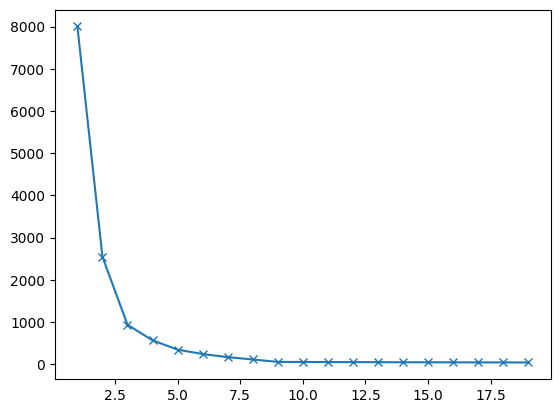

In [9]:
# now plot the inertia
plt.plot(range(1, 20), inertia, marker='x')
plt.show()

In [10]:
# now I will give a new song to the model and it will predict the genre
new_s = [0.847, 0.48, 0.0523, 0.0729, 3.48e-06, 0.131]

print(model.predict([new_s]))

[5]


d:\Classify-Song-Genres\.venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [12]:
# cluster 0 is associated with which genre?
print(df[df['cluster'] == 0]['genre'].value_counts())

# cluster 1 is associated with which genre?
print(df[df['cluster'] == 1]['genre'].value_counts())

# cluster 2 is associated with which genre?
print(df[df['cluster'] == 2]['genre'].value_counts())

# cluster 5 is associated with which genre?
print(df[df['cluster'] == 5]['genre'].value_counts())

genre
Hip Hop            56
K-pop              49
Rap                41
Pop                36
R&B                18
Rock               15
Techno              3
Rythm and Blues     3
Name: count, dtype: int64
genre
Jazz               36
Rythm and Blues     2
Name: count, dtype: int64
genre
Techno    68
Jazz       3
Rap        2
R&B        2
K-pop      1
Pop        1
Name: count, dtype: int64
genre
R&B                27
Pop                20
Hip Hop            19
Rap                17
Rock               16
Rythm and Blues    15
K-pop              13
Techno              2
Name: count, dtype: int64


In [18]:
dd = df.groupby('genre')['cluster'].value_counts()